<a href="https://colab.research.google.com/github/nikhilpatil1104/Detection-of-Glaucoma-Disease-using-Image-Processing-SoftComputing-DeepLearningApproaches-/blob/main/gluco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_dir = '/content/drive/MyDrive/training_set'
test_dir = '/content/drive/MyDrive/test_set'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 311 images belonging to 2 classes.
Found 174 images belonging to 2 classes.


In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,137,729 (80.63 MB)

 Trainable params: 6,423,041 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 314s 35s/step - accuracy: 0.5627 - loss: 0.7262 - val_accuracy: 0.6500 - val_loss: 0.6858
Epoch 2/20
1/9 ━━━━━━━━━━━━━━━━━━━━ 2:31 19s/step - accuracy: 0.5312 - loss: 0.8521

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


9/9 ━━━━━━━━━━━━━━━━━━━━ 140s 15s/step - accuracy: 0.5312 - loss: 0.8521 - val_accuracy: 0.6500 - val_loss: 0.6786
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 384s 39s/step - accuracy: 0.6432 - loss: 0.6303 - val_accuracy: 0.6938 - val_loss: 0.6254
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 113s 12s/step - accuracy: 0.6087 - loss: 0.6809 - val_accuracy: 0.6687 - val_loss: 0.6514
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 332s 33s/step - accuracy: 0.6967 - loss: 0.5910 - val_accuracy: 0.6750 - val_loss: 0.6230
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 143s 15s/step - accuracy: 0.6250 - loss: 0.6229 - val_accuracy: 0.6500 - val_loss: 0.6190
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 323s 35s/step - accuracy: 0.7043 - loss: 0.5985 - val_accuracy: 0.6812 - val_loss: 0.6081
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 142s 15s/step - accuracy: 0.7188 - loss: 0.4904 - val_accuracy: 0.6875 - val_loss: 0.6045
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 382s 38s/step - accuracy: 0.7234 - loss: 0.5606 - val_accuracy: 0.6875 - val_loss: 0.5968
Epo

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

6/6 ━━━━━━━━━━━━━━━━━━━━ 107s 17s/step - accuracy: 0.6347 - loss: 0.6604
Test Accuracy: 72.99%


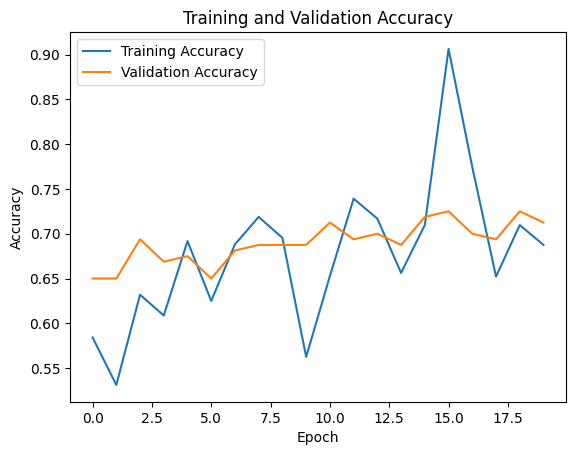

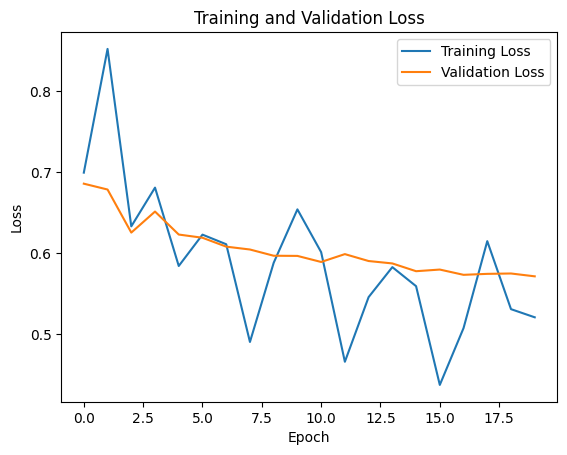

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 107s 17s/step


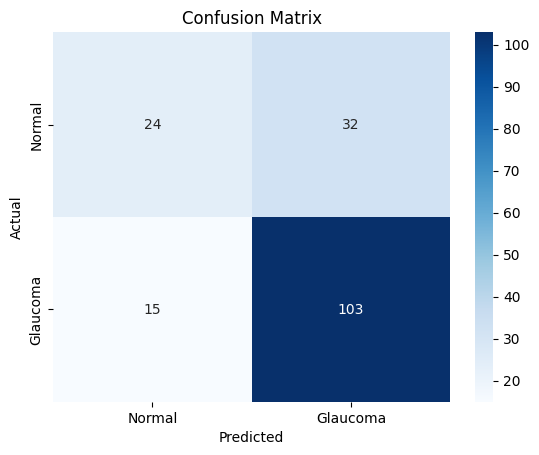

              precision    recall  f1-score   support

      Normal       0.62      0.43      0.51        56
    Glaucoma       0.76      0.87      0.81       118

    accuracy                           0.73       174
   macro avg       0.69      0.65      0.66       174
weighted avg       0.72      0.73      0.71       174



In [ ]:
y_pred = model.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int)

conf_matrix = confusion_matrix(test_generator.classes, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Glaucoma'], yticklabels=['Normal', 'Glaucoma'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(test_generator.classes, y_pred, target_names=['Normal', 'Glaucoma']))

In [ ]:
model.save('glaucoma_detection_vgg16.h5')

NameError: name 'model' is not defined

In [ ]:

from tensorflow.keras.models import load_model
loaded_model = load_model('glaucoma_detection_vgg16.h5')


In [ ]:
!pip install flask-ngrok
!pip install flask
!pip install tensorflow

In [ ]:
from flask_ngrok import run_with_ngrok
import os

# Paste your ngrok auth token here
os.environ['NGROK_AUTH_TOKEN'] = '2s8xQcduTKRIwCTN6u2xxiojUYK_883MF24G5CGqmfNXyuMgf'

In [ ]:
from flask import Flask, request, jsonify
from flask_ngrok import run_with_ngrok
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os

# Paste your ngrok auth token here
os.environ['NGROK_AUTH_TOKEN'] = '2s8xQcduTKRIwCTN6u2xxiojUYK_883MF24G5CGqmfNXyuMgf'

# Load the trained model
model = load_model('glaucoma_detection_vgg16.h5')

# Initialize Flask app
app = Flask(__name__)
run_with_ngrok(app)  # Run Flask app with ngrok for Google Colab

# Define the prediction function
def predict_glaucoma(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make a prediction
    prediction = model.predict(img_array)
    if prediction[0][0] > 0.5:
        return "Glaucoma (Positive)"
    else:
        return "Normal (Negative)"

# Define the API route for image upload and prediction
@app.route('/predict', methods=['POST'])
def predict():
    if 'file' not in request.files:
        return jsonify({'error': 'No file uploaded'}), 400

    # Get the uploaded file
    file = request.files['file']

    # Save the file temporarily
    img_path = 'temp.jpg'
    file.save(img_path)

    # Make a prediction
    result = predict_glaucoma(img_path)

    # Delete the temporary file
    os.remove(img_path)

    # Return the prediction as JSON
    return jsonify({'prediction': result})

# Run the Flask app
if __name__ == '__main__':
    app.run()

Public URL: https://9ae9-34-23-215-11.ngrok-free.app


OSError: Unable to synchronously open file (file signature not found)

In [ ]:
import h5py

try:
    with h5py.File('glaucoma_detection_vgg16.h5', 'r') as f:
        print("File opened successfully.")
        print("Keys in the file:", list(f.keys()))
except Exception as e:
    print("Error opening file:", e)

Error opening file: Unable to synchronously open file (file signature not found)


In [ ]:
import h5py

try:
    with h5py.File('/content/glaucoma_detection_vgg16.h5', 'r') as f:
        print("✅ Model file is valid!")
except Exception as e:
    print("❌ Model file is corrupted:", e)


❌ Model file is corrupted: Unable to synchronously open file (file signature not found)
